In [ ]:
import pickle

from sklearn.metrics import roc_auc_score

from xgboost import XGBClassifier

In [ ]:
with open('/content/drive/MyDrive/datasets/ps_split_data_dict.pickle', 'rb') as file:
    data_dict = pickle.load(file)

In [ ]:
y_train, y_val, y_holdout = data_dict['y_train'], data_dict['y_val'], data_dict['y_holdout']

In [ ]:
with open('/content/drive/MyDrive/datasets/ps_split_data_dict_25.pickle', 'rb') as file:
    data_dict_25 = pickle.load(file)

In [ ]:
X_train_25, X_val_25, X_holdout_25 = data_dict_25['X_train_25'], data_dict_25['X_val_25'], data_dict_25['X_holdout_25']

In [ ]:
xgb = XGBClassifier( 
                    n_estimators=30000,
                    max_depth=4,
                    objective='binary:logistic', 
                    learning_rate=.05, 
                    subsample=0.8,
                    min_child_weight=3
                    )

eval_set=[(X_train_25,y_train),(X_val_25,y_val)]
xgb.fit( 
        X_train_25, y_train, 
        eval_set=eval_set,
        eval_metric='auc',
        early_stopping_rounds=50,
        verbose=False
        )
auc = roc_auc_score(y_val, xgb.predict_proba(X_val_25)[:,1])
print(f"ROC AUC: {auc:.3f}\n")

ROC AUC: 0.645



In [ ]:
roc_auc_score(y_holdout, xgb.predict_proba(X_holdout_25)[:,1])

0.6413217140352176

In [ ]:
with open('/content/drive/MyDrive/datasets/xgb.pickle', 'wb') as file:
    pickle.dump(xgb, file)

In [ ]:
%run /content/drive/MyDrive/Colab\ Notebooks/common_functions.ipynb

In [ ]:
eval_gini(y_val, xgb.predict_proba(X_val_25)[:,1])

0.28905424495694254

In [20]:
eval_gini(y_holdout, xgb.predict_proba(X_holdout_25)[:,1])

0.28264345166362126

Best F1 score 0.123 at prob decision threshold >= 0.059


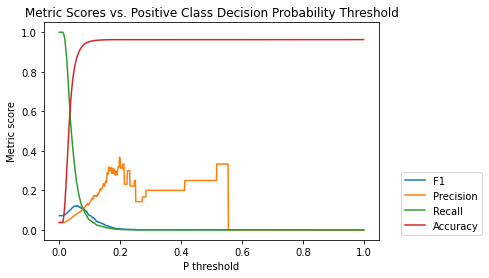

In [21]:
threshold_diagram(X_holdout_25, y_holdout, xgb)

In [26]:
y_pred_holdout = (xgb.predict_proba(X_holdout_25)[:,1] >= 0.032)

Percent claims in predicted no claim group: 2.39% 
Percent claims in predicted claim group: 5.11% 

Av payout per low risk member: $167.43 
Av payout per high risk member: $358.03 

Total Policies: 59522.00 
Total Claims: 2219.00 
Overall Percent claims 3.73%




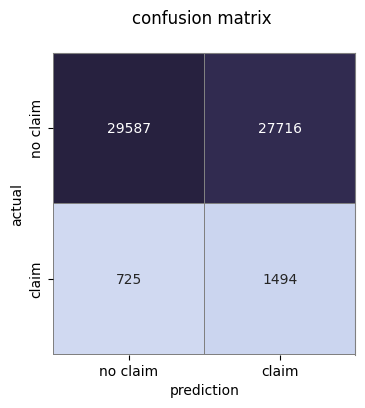

In [27]:
confusion_diagram_simple(y_holdout, y_pred_holdout)